# グラフの基礎

## 隣接行列の性質

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [43]:
G = nx.Graph()

In [44]:
G.add_edges_from([['a','b'],
                  ['a','c'],
                  ['b','e'],
                  ['c','d'],
                  ['c','e'],
                  ['d','e'],
                 ])

In [45]:
pos = nx.spring_layout(G)

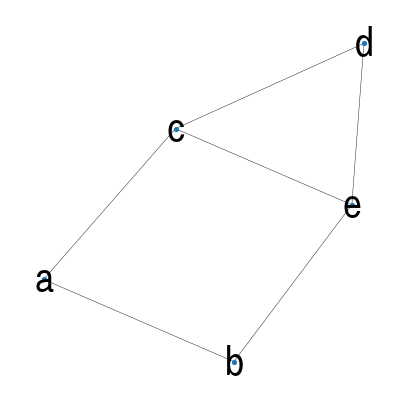

In [46]:
# グラフを描画
# 日本語表示
from matplotlib.font_manager import FontProperties
font_path = "/usr/share/fonts/truetype/fonts-japanese-gothic.ttf"
font_prop = FontProperties(fname=font_path)
matplotlib.rcParams["font.family"] = font_prop.get_name()


plt.figure(figsize=(5,5))
nx.draw_networkx(G, pos, with_labels=True, node_size=30,node_shape='.', width=0.3, font_size=30, font_family=font_prop.get_name())
plt.axis("off")
plt.show()

In [48]:
G.edges()

EdgeView([('a', 'b'), ('a', 'c'), ('b', 'e'), ('c', 'd'), ('c', 'e'), ('e', 'd')])

In [49]:
A = nx.adjacency_matrix(G, nodelist=['a','b','c','d','e']).toarray()

In [50]:
A

array([[0, 1, 1, 0, 0],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 1, 1],
       [0, 0, 1, 0, 1],
       [0, 1, 1, 1, 0]])

$A=\begin{pmatrix}
  0&1&1&0&0 \\
  1&0&0&0&1 \\
  1&0&0&1&1 \\
  0&0&1&0&1 \\
  0&1&1&1&0 \\
\end{pmatrix}$

In [51]:
A.T - A

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [52]:
A2 = np.dot(A,A)

In [53]:
A2

array([[2, 0, 0, 1, 2],
       [0, 2, 2, 1, 0],
       [0, 2, 3, 1, 1],
       [1, 1, 1, 2, 1],
       [2, 0, 1, 1, 3]])

In [54]:
A3 = np.dot(A2,A)

In [55]:
A3

array([[0, 4, 5, 2, 1],
       [4, 0, 1, 2, 5],
       [5, 1, 2, 4, 6],
       [2, 2, 4, 2, 4],
       [1, 5, 6, 4, 2]])

In [56]:
nx.diameter(G) #直径

2

In [57]:
nx.density(G)

0.6

## 非連結グラフの性質

In [67]:
G = nx.Graph()
G.add_edges_from([
    ('a','b'),
    ('a','e'),
    ('c','f'),
    ('d','g'),
    ('g','h'),
    ('h','i'),
    ('i','d'),
])

In [68]:
pos = nx.spring_layout(G)

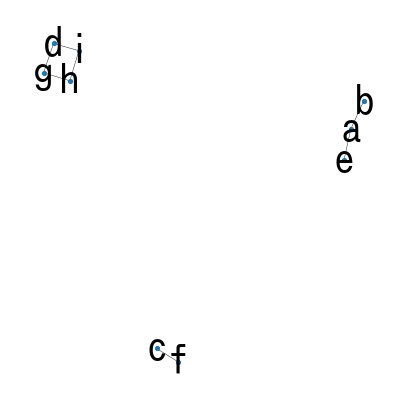

In [69]:
plt.figure(figsize=(5,5))
nx.draw_networkx(G, pos, with_labels=True, node_size=30,node_shape='.', width=0.3, font_size=30, font_family=font_prop.get_name())
plt.axis("off")
plt.show()

In [85]:
nodes = sorted(G.nodes())

In [87]:
nodes

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

#### 最大連結成分の抽出

In [110]:
largest_cc = max(nx.connected_components(G), key=len)

In [111]:
largest_cc

{'d', 'g', 'h', 'i'}

In [112]:
g = G.subgraph(largest_cc)

In [113]:
g.edges

EdgeView([('d', 'g'), ('d', 'i'), ('i', 'h'), ('g', 'h')])

### グラフラプラシアン

A = nx.adjacency_matrix(G, nodelist=nodes).toarray()

In [114]:
A

array([[0, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 1, 0]])

In [84]:
degDic = G.degree()

In [89]:
D = np.zeros((len(nodes),len(nodes)))

In [91]:
for i, n in enumerate(nodes):
    deg = degDic[n]
    D[i,i] = deg

In [92]:
D

array([[2., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 2., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 2., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 2., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 2.]])

In [93]:
L = D - A

In [94]:
L

array([[ 2., -1.,  0.,  0., -1.,  0.,  0.,  0.,  0.],
       [-1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  2.,  0.,  0., -1.,  0., -1.],
       [-1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  0.,  0.,  2., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.],
       [ 0.,  0.,  0., -1.,  0.,  0.,  0., -1.,  2.]])

In [99]:
l = nx.laplacian_matrix(G, nodelist=nodes).toarray()

In [100]:
l

array([[ 2, -1,  0,  0, -1,  0,  0,  0,  0],
       [-1,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, -1,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0, -1,  0, -1],
       [-1,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, -1,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0, -1,  0,  0,  2, -1,  0],
       [ 0,  0,  0,  0,  0,  0, -1,  2, -1],
       [ 0,  0,  0, -1,  0,  0,  0, -1,  2]])

In [116]:
L == l

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True]])

In [106]:
eig = np.linalg.eigvals(L)

In [109]:
eig.astype(np.float16) #3つ０の固有値を持つ場合、連結していないグラフが３つあることを示す

array([ 3., -0.,  1.,  0.,  2.,  4.,  2.,  0.,  2.], dtype=float16)

### クラスタ係数

#### ノードのクラスタ係数
- $c_i = \frac{T_i}{{}_{deg_i} C_2}$

In [121]:
G = nx.karate_club_graph()
ccoeffs = nx.clustering(G)

In [122]:
ccoeffs

{0: 0.15,
 1: 0.3333333333333333,
 2: 0.24444444444444444,
 3: 0.6666666666666666,
 4: 0.6666666666666666,
 5: 0.5,
 6: 0.5,
 7: 1.0,
 8: 0.5,
 9: 0,
 10: 0.6666666666666666,
 11: 0,
 12: 1.0,
 13: 0.6,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 0.3333333333333333,
 20: 1.0,
 21: 1.0,
 22: 1.0,
 23: 0.4,
 24: 0.3333333333333333,
 25: 0.3333333333333333,
 26: 1.0,
 27: 0.16666666666666666,
 28: 0.3333333333333333,
 29: 0.6666666666666666,
 30: 0.5,
 31: 0.2,
 32: 0.19696969696969696,
 33: 0.11029411764705882}

#### グラフのクラスタ係数
- $c = \sum_i \frac{c_i}{N}$

In [128]:
np.average(list(ccoeffs.values()))

0.5706384782076823

In [130]:
nx.average_clustering(G)

0.5706384782076823

### ランダムグラフ

#### Erdős-Rényiグラフ

In [174]:
n = 100
p = 0.1

In [175]:
G = nx.erdos_renyi_graph(n,p)

In [176]:
pos = nx.spring_layout(G)

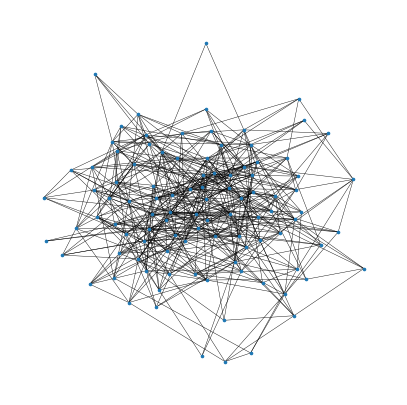

In [177]:
plt.figure(figsize=(5,5))
nx.draw_networkx(G, pos, with_labels=False, node_size=10,node_shape='.', width=0.3, font_size=30, font_family=font_prop.get_name())
plt.axis("off")
plt.show()

#### Barabasi-Albertグラフ

In [186]:
m = 1

In [187]:
G = nx.barabasi_albert_graph(n,m)

In [188]:
pos = nx.spring_layout(G)

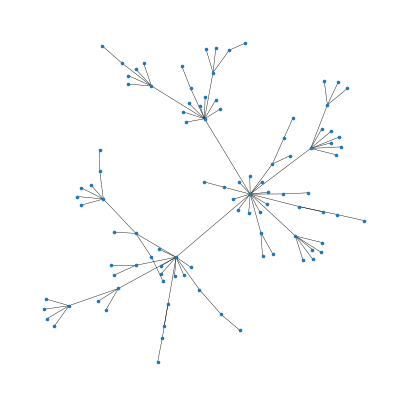

In [189]:
plt.figure(figsize=(5,5))
nx.draw_networkx(G, pos, with_labels=False, node_size=10,node_shape='.', width=0.3, font_size=30, font_family=font_prop.get_name())
plt.axis("off")
plt.show()

##### スケールフリー性
- $P(k) \propto k^{-\gamma} \Leftrightarrow \log P(k) \propto -\gamma logk$

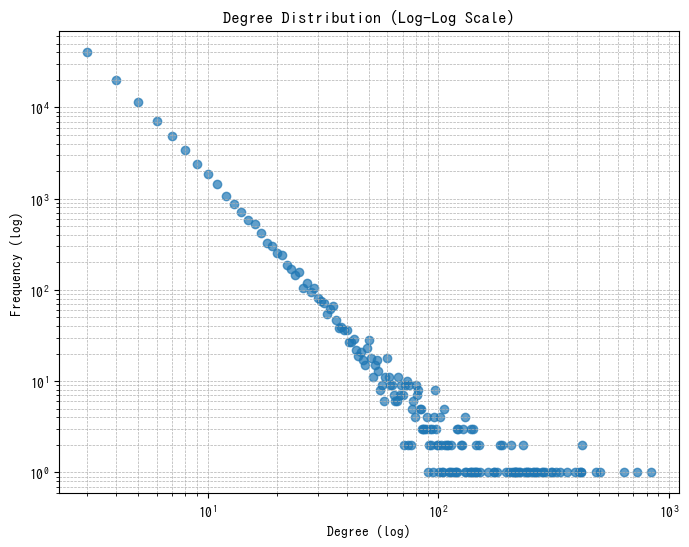

In [275]:
import collections as cl

# パラメータを指定してBAグラフ生成
n = 100000  # ノード数
m = 3     # 各ノードが接続する辺の数
G = nx.barabasi_albert_graph(n, m)

# 各ノードの次数を取得
degrees = [d for _, d in G.degree()]
degree_counts = cl.Counter(degrees)

# 度数分布データをx, yに変換（次数 vs 頻度）
x = np.array(list(degree_counts.keys()))
y = np.array(list(degree_counts.values()))

# 0はlogスケールで扱えないので除外
nonzero = x > 0
x = x[nonzero]
y = y[nonzero]

# 両対数グラフで描画
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Degree (log)")
plt.ylabel("Frequency (log)")
plt.title("Degree Distribution (Log-Log Scale)")
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()

#### Watts-Strogatzグラフ

In [283]:
n = 100
k = 5
p = 0.3

In [284]:
G = nx.watts_strogatz_graph(n,k,p)

In [285]:
pos = nx.spring_layout(G)

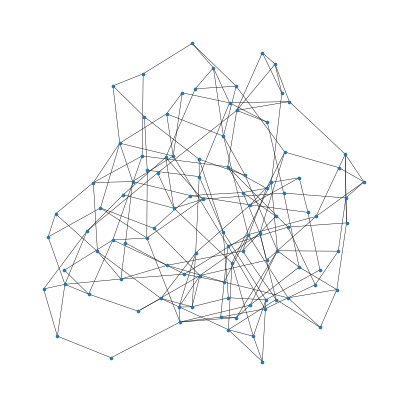

In [286]:
plt.figure(figsize=(5,5))
nx.draw_networkx(G, pos, with_labels=False, node_size=10,node_shape='.', width=0.3, font_size=30, font_family=font_prop.get_name())
plt.axis("off")
plt.show()

### 中心性

In [288]:
G = nx.karate_club_graph()

In [289]:
pos = nx.spring_layout(G)

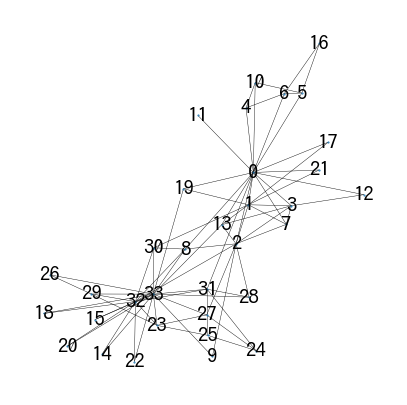

In [313]:
plt.figure(figsize=(5,5))
nx.draw_networkx(G, pos, with_labels=True, node_size=1,node_shape='.', width=0.3, font_size=15, font_family=font_prop.get_name())
plt.axis("off")
plt.show()

In [314]:
#次数中心性
print(f"Ranking, node, centval")
for i,(nid, centval) in enumerate(sorted(nx.degree_centrality(G).items(), key= lambda x:-x[1])):
    if i > 5:
        break
    print(f"{i+1},{nid},{centval:.3f}")

Ranking, node, centval
1,33,0.515
2,0,0.485
3,32,0.364
4,2,0.303
5,1,0.273
6,3,0.182


In [315]:
#固有ベクトル中心性
print(f"Ranking, node, centval")
for i,(nid, centval) in enumerate(sorted(nx.eigenvector_centrality(G).items(), key= lambda x:-x[1])):
    if i > 5:
        break
    print(f"{i+1},{nid},{centval:.3f}")

Ranking, node, centval
1,33,0.373
2,0,0.355
3,2,0.317
4,32,0.309
5,1,0.266
6,8,0.227


In [316]:
#PageRank
print(f"Ranking, node, centval")
for i,(nid, centval) in enumerate(sorted(nx.pagerank(G).items(), key= lambda x:-x[1])):
    if i > 5:
        break
    print(f"{i+1},{nid},{centval:.3f}")

Ranking, node, centval
1,33,0.097
2,0,0.089
3,32,0.076
4,2,0.063
5,1,0.057
6,31,0.042


In [317]:
#媒介中心性
print(f"Ranking, node, centval")
for i,(nid, centval) in enumerate(sorted(nx.betweenness_centrality(G).items(), key= lambda x:-x[1])):
    if i > 5:
        break
    print(f"{i+1},{nid},{centval:.3f}")

Ranking, node, centval
1,0,0.438
2,33,0.304
3,32,0.145
4,2,0.144
5,31,0.138
6,8,0.056


In [318]:
#近接中心性
print(f"Ranking, node, centval")
for i,(nid, centval) in enumerate(sorted(nx.closeness_centrality(G).items(), key= lambda x:-x[1])):
    if i > 5:
        break
    print(f"{i+1},{nid},{centval:.3f}")

Ranking, node, centval
1,0,0.569
2,2,0.559
3,33,0.550
4,31,0.541
5,8,0.516
6,13,0.516


In [323]:
# Gephi用に出力
nx.write_gml(G, "karate.gml")

In [327]:
# ego network　距離１
g = nx.ego_graph(G, 1, 1)

In [328]:
pos = nx.spring_layout(g)

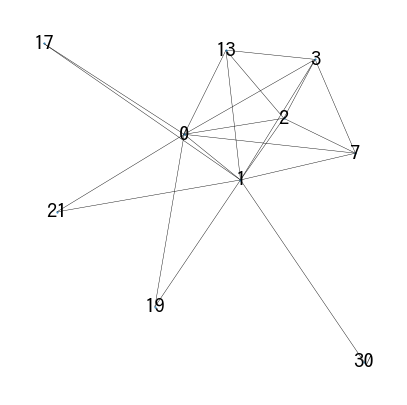

In [329]:
plt.figure(figsize=(5,5))
nx.draw_networkx(g, pos, with_labels=True, node_size=1,node_shape='.', width=0.3, font_size=15, font_family=font_prop.get_name())
plt.axis("off")
plt.show()

In [330]:
# ego network　距離2
g = nx.ego_graph(G, 1, 2)

In [331]:
pos = nx.spring_layout(g)

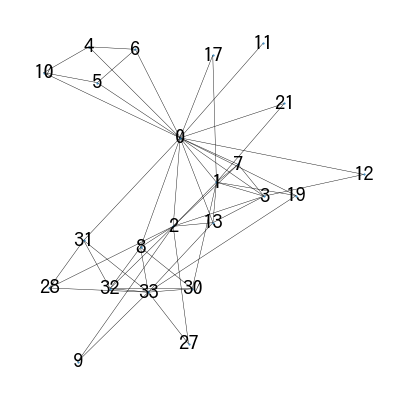

In [332]:
plt.figure(figsize=(5,5))
nx.draw_networkx(g, pos, with_labels=True, node_size=1,node_shape='.', width=0.3, font_size=15, font_family=font_prop.get_name())
plt.axis("off")
plt.show()